# Root Finding: Univariate Functions

## Numerical Methods

The majority of our prior courses in algebra, calculus, physics, chemistry, and engineering present us with problems that are difficult to formulate but straightforward to solve.  What I mean is that we may struggle to develop the model equation that describes our system, but once we have that equation, it is usually easy for us to solve. Often, we are even able to solve that equation ***analytically***. What do we mean by solving a problem analytically?  This is when we are able to use methods from algebra, trigonometry, calculus, etc. to "solve for x", i.e., to obtain a closed form solution that explicitly states the value of my variable of interest. Some examples to clarify that point.  The following equation:

$$0 = x^2 - 25$$

Can be solved ***analytically*** by factoring or by simply moving 25 to the left hand side of the equation and taking the square root, giving:

$$x = 5 \ \textrm{or} \ x = -5$$
    
If not that, we could use a quadratic equation to get an explicit solution for x.

Another example from calculus:  Let's say I want to compute the area under the curve given by $y = 3x^3$ from x = 0 to x = 10.  It is straightforward to evaluate that definite integral:

$$\mathrm{Area} = \int_0^{10}(3 x^3 dx) = \frac{3}{4} \cdot x^4 \big|_0^{10}$$

Which is evaluated as:

$$\mathrm{Area} = \left(\frac{3}{4} \cdot 10^4\right) - \left(\frac{3}{4} \cdot 0^4\right) = 7500$$

Most of us are comfortable with these types of analytical solutions because it is what we've been trained to do. As we begin to deal with more advanced topics, we often need to solve problems where it may be tedious, difficult, or even impossible to find an analytical solution. This is where ***numerical solutions*** come in.  Generally speaking, numerical methods are algorithms that employ simple operations (addition, subtraction, multiplication, and division) to provide approximate solutions to problems that do not have tractable analytical solutions. The basic operations at the core of numerical methods (addition, subtraction, multiplication, and division) are repeated iteratively, often many, many times, until we obtain a solution that is within our precision tolerance for a particular problem.

```{note}
The iterative nature of numerical methods makes them very tedious on paper but extremely efficient in most programming languages.
```

When we first encounter numerical methods, many of us are uncomfortable with them because they look so different from the analytical solutions that have been ingrained in our minds as the way we will solve problems.  But fear not!  Most of them are conceputally very simple! Further, there are packages available in Python that automate most numerical methods for us, so once we get the hang of syntax, they are very, very easy to use.  

First, we will see what is under the hood with numerical methods for a couple of test problems to get a feel for how they work, and then we'll introduce some packages available in Python that handle numerical solutions for us in a very efficient and robust way.

Exercises on general Numerical Methods are covered in Modules 09 - 14. They address four broad classes of problems that are essential for engineers to know:

1. Root finding -- Supplements 09 and 12
2. Optimization (finding minima and maxima) -- Supplements 10 and 11
3. Solving differential equations (initial value problems) Supplement 14
4. Numerical Quadrature (integrating a univariate function or discrete data set) Supplement 14

To build confidence when trying to learn a new method for problem solving, I advocate testing it out on a problem that we already know how to solve to make sure we get the correct answer. Once you master that, then apply the methods to increasingly complex problems.

A final note about why you should embrace numerical methods:  Once you *get* them, they are really easy - often times they are *much* easier than developing an analytical solution.  You can write a code to handle them, and then reuse that code over and over and over by adapting it to suit the problem at hand.  They will greatly expand your ability to solve problems, and I guarantee that you will be able to use them in the rest of your engineering curricula.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Root Finding

Let's start with the most straightforward case first - using numerical methods to find the root of a function. All we mean by root finding is that we are finding the value of the function argument(s) where the function is equal to zero.  

## Root Finding for Univariate Functions

We will start with the case of root finding with a ***univariate function***, which basically means ***a function that only has one independent variable***. For example, 

$$y(x) = x^2 + exp(x) - 7x + 5$$

is only a function of x.  Once I specify a value of x, I can evaluate the corresponding value of y.  y is thus a univariate function of x. We actually introduced a test univariate function in Supplement 06 (While Loops), and we used a simple numerical method to solve it, so let's pick up that example, use it again here, and expand our toolkit.

### The basic problem

We have a *univariate* function, 

$$y = f(x) = 5x^2 + 8x - 23$$ 

We would like to find the **roots** for that function. By that, we mean the values of x where y = 0. So, when we discuss "root finding" for this equation, we are simply solving the equation below for x:

$$0 = 5x^2 + 8x - 23$$

This is an important thing to remember as we move forward. The equations that we see and develop in our models will take many different forms, but when we write programs that use numerical methods to solve them, for a univariate function, we will always be solving 0 = f(x), and so we will have to write our code accordingly.

### The Utility of Graphing your Functions

Anytime I can do so (and I can typically do so with univariate functions), I will graph the function of interest on various domains (ranges of x values) so that I can see where roots might be located. As we consider the use of numerical methods, we will see how important it is to provide good initial guesses for the root or a reasonable range of x-values where we think we are likely to find the root. So if it is possible, start by graphing the function of interest.

We haven't talked much about graphing functions. It seems straightforward until you go to do it in base Python, and then you might scratch your head a bit as to how you'd actually use a function to generate a large set of y values from a large set of x values. So let's cover a bit of syntax using lists (which we are familiar with), and then cover some of the utility of numpy arrays in these types of operations. 

#### Defining the function

Let's define the function of interest in the form of 0 = f(x)

In [2]:
def y(x):
    return 5*x**2 + 8*x - 23

#### Plotting the function in base Python using lists

I can use that function to calculate the value of y for any value of x. If you ever end up working with Python in detail, you need to be familiar with lists and how to use them since they are a major part of base Python. If I wanted to prepare a set of x values and their corresponding y values using this function, I would probably do so with a pair of list comprehensions (or for loops), whichever you prefer:

In [3]:
xplot_list = [i/10 for i in range(-4,31)]     #Create a list of x-values
yplot_list = [y(x)  for x in xplot_list]  #Create a list of y-values for each x value

Now I have my set of (x,y) pairs in two separate lists. I can plot them using:

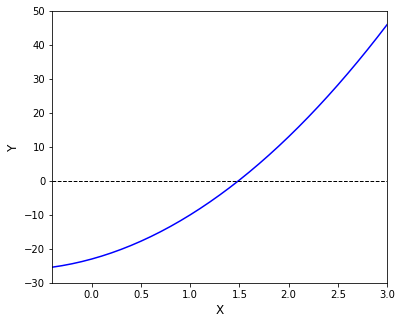

In [4]:
plt.figure(1, figsize = (6, 5))
plt.plot(xplot_list, yplot_list, color = 'blue')
plt.hlines(0, -4, 3, color = 'black', linewidth = 1, linestyle = 'dashed') #Adding a y = 0
plt.xlim(min(xplot_list), max(xplot_list))
plt.ylim(-30, 50)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.show()

I can see from that graph that there are two roots (which is the most we can have for a quadratic).  There is one between -4 and -3, and there is another between 1 and 2.

### Numpy arrays are probably what you want...

Now that we've used a function for graphing collections that are structured as lists, we should remember that it is often easier to use numpy arrays. They natively support element-wise/vectorized operations, so I don't necessarily need to use loops or comprehensions. They also make it easy to generate evenly spaces sets of floating point decimals, whereas list/range will generally force me to work with integers.

For an illustration of element-wise operations, let's create the exact same set of x-values using `numpy.linspace()`, which creates a set of evenly spaced floating point numbers on the interval specified.

In [5]:
xplot_ndarray = np.linspace(-4, 3, 50)

### Numpy arrays support broadcasting, so you can pass them to a function

By default, numpy arrays will have element-wise operations for addition, subtraction, multiplication (including raising to a power), and division. This means that I can easily pass a numpy array as an argument to a function and have that function operate element-by-element on the array. If I was using lists, as we saw above, we would write a for loop or a list comprehension to do this, whereas with a numpy array, we can pass it directly as a function argument. 

Using numpy arrays with our function y to generate and x,y pairs. If it is convenient, you can pass the array directly to the function as an argument in plot (i.e., it isn't absolutely necessary to create another array just for plotting). This behavior of numpy arrays is a lot like what you see in Matlab where vectors and matrices both handle element-wise operations well. Indeed, even the syntax (linspace) is the same as Matlab. In many ways, numpy *feels* like a Matlab extension for Python. 

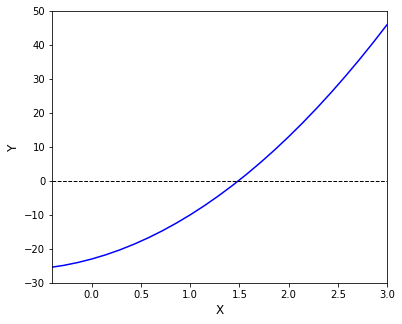

In [6]:
plt.figure(1, figsize = (6, 5))
plt.plot(xplot_ndarray, y(xplot_ndarray), color = 'blue')
plt.hlines(0, -4, 3, color = 'black', linewidth = 1, linestyle = 'dashed') #Adding a y = 0
plt.xlim(min(xplot_list), max(xplot_list))
plt.ylim(-30, 50)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.show()

### Recall: there is an analytical solution to this equation

We know from Module 05 (or just recalling our math background) that we can solve this problem exactly using the quadratic equation:

$$x = \frac{-8 \pm \sqrt{8^2 - 4\cdot5\cdot-23}}{2\cdot5}$$

Solving this, we find:

$$x = 1.489 \ \ \textrm{or} \ \ x = -3.089$$

This is absolutely consistent with our graphical analysis, as it should be! For me, this is a hugely important step when learning a new method:  we are establishing the correct answer using a method we are comfortable with *before* we start writing code to implement a method that is unfamiliar too us.

### A very crude numerical method (guess and check)

Back in Module 05, you may recall that we wrote a while loop to solve this problem:

```python
x = 0.0    
y = -23.0  
while abs(y) > 0.1:       
    y = 5*x**2 + 8*x - 23 
    print(round(x,2),round(y,2))            
    x += 0.01
print(round(x,2),round(y,2))
```
        
The above is basically a small piece of code that automates an uninformed, brute force guess-and-check iteration. At its core, you'll see there is no complex mathematical analysis: we guess a value for x, and we use simple operations to calculate the resulting value of y. We continue changing our value of x until we are close enough to y = 0 that we are satisfied with the solution. This is a very basic numerical method!

I don't advocate you use this one - it is crude in terms of tolerance, slow to converge, and rather unstable.  We really just used it to illustrate the function of a while loop. There are far better strategies for root finding. For example:

### Newton-Raphson Method

A common entry point to numerical root finding is the Newton-Raphson Method. As with most numerical analysis, this is an iterative method, but it uses information about the function value and the derivative value to make more informed iterations. The general "formula" for the Newton-Raphson iteration is:

$$x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}$$

In other words, you make a guess for x ($x_i$), you evaluate the function at that value of x, $f(x_i)$, and you evaluate the derivative of the function at that value of x, $f^\prime(x_i)$  You subract the function value divided by its derivative value from the current value of x, and that gives you the updated value of x. You proceed with this iteration until your function value is sufficiently close to zero that you are satisfied with the solution, i.e., you are within your precision tolerance. This algorithm is *much* more efficient than the simple guess and check method we used above.  We can write a Newton-Raphson iteration to solve our example problem. Because this is a far faster and more robust method, I will set a much tighter tolerance. You will notice that it takes far fewer iterations, and it converges to much closer to the value of the true root(s).  

In [7]:
x = 0.0
y = -23.0
while abs(y) > 1e-8:
    y  = 5*x**2 + 8*x - 23
    dy = 10*x + 8
    x  = x - y/dy
    print(round(x,10),round(y,10))

2.875 -23.0
1.7504251701 41.328125
1.5024922836 6.3233427406
1.4891435492 0.3073535809
1.4891046288 0.0008909436
1.4891046285 7.6e-09


### Newton-Raphson is much better than guess and check

Wow! I first learned the Newton-Raphson method in about 1999, where I had to write out several iterations by hand on green graph paper and solve it with a TI-89. After all these years, it still blows my mind how well it works.

A couple of things you should get used to: First, this method will return a single root.  The one that it finds is largely determiend by my initial guess. If you know there are multiple roots, you can usually locate them by making different initial guesses in the range where you know the root to be - this is why a graphical analysis is useful. Second, in the above example, I wrote out the expressions for y and the derivative of y inside the body of the while loop, but I could just as easily define them as external functions.  This will be really handy in that we can test many methods on a single function (which we will do later in this Module). You should get used to that interchangability and how you can use an externally defined function over and over again throughout your code.

In [8]:
def y(x):
    return 5*x**2 + 8*x - 23
def dy(x):
    return 10*x + 8

x = 1
while abs(y(x)) > 1e-8:
    x = x - y(x)/dy(x)
print(round(x,10)) 

1.4891046285


### Visualizing the progress of the iterations

Finally, for a cool visualization of how iterative root finding algorithms proceed, run this code: It will give you a graphical output of the initial guess and the updated root location after each iteration. We start it out with a rather poor initial guess (x = 10), but eventually, you'll see that it settles in and stops at the value of the true root.

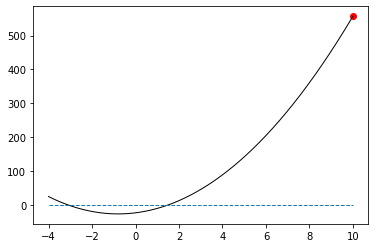

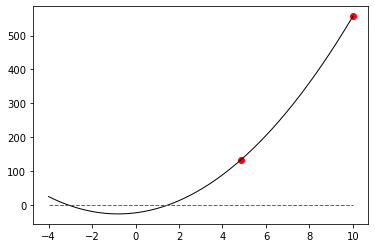

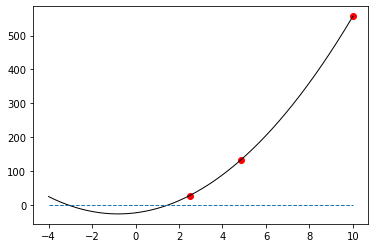

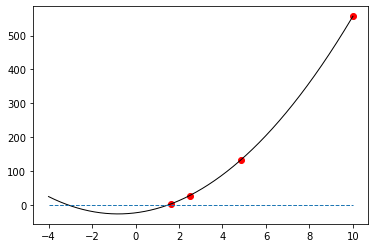

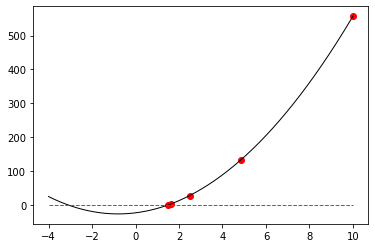

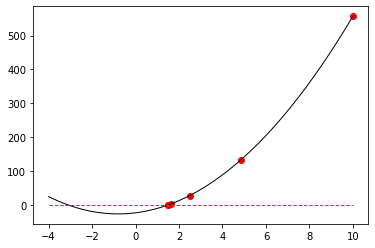

In [9]:
def y(x):
    return 5*x**2 + 8*x - 23
def dy(x):
    return 10*x + 8

xplot = np.linspace(-4,10,10000)
yplot = y(xplot)
xrange = [-4, 10]
yrange = [0, 0]

x = 10
xlist = []
ylist = []
while abs(y(x)) > 1e-8:
    xlist.append(x)
    ylist.append(y(x))
    plt.plot(xplot,yplot, color = 'black',linewidth = 1)
    plt.plot(xrange,yrange, linestyle = 'dashed', linewidth = 1)
    plt.scatter(xlist, ylist, color = 'red', marker = 'o')
    plt.show()
    x = x - y(x)/dy(x)

### Probably we should leave numerical method scripts to the professionals...

So that's a simple and efficient numerical method for root finding! It's elegant, and there isn't much complicated about it in practice!

We used basic operations (add, subtract, multiple, and divide) in an iterative loop to solve a nonlinear equation. Now, it is entertaining to write a Newton-Raphson method in a script. It's fine to do, but usually, I would advocate for taking advantage of methods available already in Python.  First, they have been optimized by mathematicians and computer scientists, and so, in general, I would expect faster and more stable performance from a Python root finding algorithm than one I have written from scratch. Second, the Newton-Raphson method is not always going to be the right choice.  It is not guaranteed to converge, and it may give you poor stability in solving certain equations.  There are many other options you might want to try, they are pretty much all built into Python packages, and they all use pretty much interchangeable syntax, which makes it easy to try a different method when the first fails. You'll find most of these root finding tools in the Scipy package, specificially in scipy.optimize. Feel free to do a deep dive on root finding algorithms in your spare time.

https://en.wikipedia.org/wiki/Root-finding_algorithms

## Scipy

Scipy is a package that includes numerical methods and optimization routines, and it includes multiple options for root finding with univariate functions. 

https://docs.scipy.org/doc/scipy/reference/optimize.html

Don't worry too much if the documentation is overwhelming right now; it will become more clear as we go through examples.  I think in the Scipy documentation, they use the term "scalar" functions similarly to how I've been using "univariate" functions here.  What they mean is a function that produces a scalar output, not a list, array, tuple, etc.  "Scalar function" might be a better way to describe them than "univariate functions," but for our purposes, they are roughly the same - you'll use them to solve a single equation, 0 = f(x), where there is a single independent variable.

### Import `Scipy.optimize`

First, let's import `scipy.optimize`:

In [10]:
import scipy.optimize as opt

### Methods for root finding in univariate, scalar functions

We'll start in this module with methods available for root finding in univariate scalar functions.  These are functions that take a single argument (e.g., "x") and return a single output (e.g., "y"). Methods for finding the root(s) of a univariate scalar function are included in the `scipy.optimize` package, which we have aliased as `opt` here; they have a few common syntax conversions:
   
The Scipy implementation of "Newton-Raphson" (`opt.newton()`) includes the Newton-Raphson iteration that we demonstrated above, a secant method, and Halley's method; the choice of which it uses is determined by the inputs you give to the problem. At a minimum, it requires a function and an intial guess at the solution:

```python
opt.newton(function_name, initial_guess)
```
In this format, it is critically important that the function that we have written takes a single, scalar argument, and it returns the "left hand side" of the function that we want to be equal to zero.  For example, our function above called `y` takes a single argument `x`, and it returns the value of $5x^2 + 8x - 23$.  That equation should result in zero once we have found the root.

This version of "newton" actually uses a secant method, not a true NR iteration since we provide no information about the derivative. For this particular example, all we provide is our function handle (y) and our initial guess at the root value (0). The output of this specific syntax above will just give me the value of the root. Try it out and see; it should give you the result you expect based on the quadratic formula

In [11]:
opt.newton(y, 0)

1.4891046284519192

### A true Newton-Raphson iteration in `opt.newton()`

If you wanted to run an identical Newton-Raphson iteration to what you wrote in the while loop, you have to supply the derivative as a function of x to newton using the `fprime` keyword argument. Fortunately, we already wrote a function for the derivative (dy):

In [12]:
opt.newton(y, 0, fprime = dy)

1.4891046284519194

### Displaying more information

It may sometimes be of interest to have more information about the progress made during the iterations. Usually, I like to know if the method converged or not, and by "converged" we mean did it find a value of x where y is sufficiently close to zero that it was within our tolerance. Sometimes you will notice a numerical method gives you a solution that you know to be incorrect.  When this happens, it is usualy a safe bet that the method did not converge, so you should get in the habit of looking at the convergence of the solution. You can do that by adding options. Here, we request a Newton-Raphson iteration (by providing the derivative) as well as a full output by specifying `full_output = True`. We won't cover the full options available, but you have a lot of flexibility in terms of adjusting tolerance, passing extra parameters as function arguments, etc.  In general, scipy root finding algorithms can probably handle whatever you have in mind.

In [13]:
opt.newton(y,0, fprime = dy, full_output = True)

(1.4891046284519194,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 1.4891046284519194)

### Selecting different algorithms for solving univariate problems.

As mentioned above, Scipy's "newton" includes Newton-Raphson, a secant method, and Halley's method (you can read about them if you like), and I've had pretty good luck with it in solving nonlinear scalar equations. I would say that `opt.newton()` without specifying a derivative is probably a good default choice for univariate root finding. 

There are other options available that are generally based on some sort of bracketing method where you specify the endpoints of the range that you want to search for a root. These include `opt.brentq()`, `opt.brenth()`, `opt.ridder()`, `opt.bisect()`, and `opt.toms748()`. You may want to use these if `opt.newton()` fails to converge; they all have advantages and disadvantages. `opt.newton()`, for example, is a relatively fast method, but it is not guaranteed to converge, whereas bracketing methods, such as `opt.brentq()` are relatively slow and slighly more difficult to provide brackets for, but they are guaranteed to converge. 

The bracketing methods are all called with the following basic syntax.  

```python
opt.algorithm_name(function_name, lower_limit, upper_limit)
```
    
For example, to use `opt.brentq()`, we provide the function handle (y), the lower bracket of the interval where we want to look for a root, and the upper bracket of the interval where we want to look for a root. For bracketing methods, the function value at the lower limit (f(lower)) and the function value at the upper limit f(upper) need to have opposite signs. We can easily determine this by looking at a graph. For example, we can see that at x = -2, y(-2) = -19 and at x = 2, y(2) = 13...so x = -2 to x = 2 is a good range to specify for a bracketing algorithm like brentq.  It should locate a root between x = -2 and x = 2. And as above with newton, I have the option of requesting a full output using keyword arguments:

In [14]:
opt.brentq(y, -2, 2, full_output = True)

(1.4891046284519196,
       converged: True
            flag: 'converged'
  function_calls: 10
      iterations: 9
            root: 1.4891046284519196)

### `opt.root_scalar()`

If you review the Scipy documentation, you may notice another solver called `root_scalar()`. Its syntax is a little more complicated, but it seems to be an option that lets you change methods as you see fit by only changing the method option, initial guess, and/or brackets.  It's also a nice bridge function to the methods we will consider for multivariate functions (these are the methods we'll use to solve nonlinear systems of equations), so it's worth introducing `opt.root_scalar()` usage in a few simple cases.  For example, if I want to use a newton method through `opt.root_scalar()`, I need to specify the function, the starting point, the derivative, and the method:

In [15]:
opt.root_scalar(y, x0 = 0, fprime = dy, method = 'newton')

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.4891046284519194

If I wanted to use the brentq method, I need the function, a bracket, and the method name:

In [16]:
opt.root_scalar(y, bracket = [-2, 2], method = 'brentq')

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1.4891046284519196

And if brentq was no good, you can try toms748:

In [17]:
opt.root_scalar(y, bracket = [-2, 2], method = 'toms748')

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 1.4891046284519194

```{note}
As far as I can tell, there is no difference in the algorithms employed by `opt.root_scalar()` and the direct calls to a specific algorithm using syntax like `opt.newton()`, `opt.brentq()`, etc. They invoke the same machinery using slightly different syntax, and they output a slightly different solution structure. I do like the universal interface of `root_scalar()`, and I suspect it may eventually reach a point where everything but `root_scalar()` becomes deprecated, so it is worth considering it here. Also, using root scalar is a good place to get some practice with specifying options using keyword arguments (`bracket = [-2, 2]` for example)
```

### Numerical root finding is difficult...

Now we will add some trouble to the system. The above example is really well-behaved. It is a robust 2nd order polynomial, and pretty much anything we use - graphical, quadratic, or any available numerical methods will solve it easily. Further, you can guess almost anything for your initial value of x, or provide reasonable brackets for the solver, and the algorithm will find the correct root.  This isn't always the case.  Some equations are more difficult to handle than others, and you may have to pay close attention to your initial guess or even your choice of solver.  This example is a bit contrived, but it will illustrate the point:

Consider the function:

$$g(t) = -0.74 + 0.765t + 1.1t^2 - 3.55t^3$$

When approaching a new problem that I will try to solve numerically, it is always helpful to graph it. Go ahead and do so to see if you can narrow down the range where you should look for a root.  


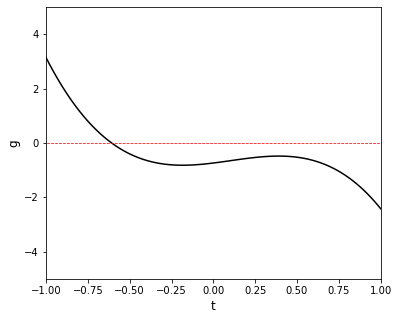

In [18]:
def g(t):
    return -0.74  + 0.765*t + 1.1*t**2 - 3.55*t**3
def dg(t):
    return 0.765 + 2.2*t - 3*3.55*t**2

tset = np.linspace(-1, 1, 100)
plt.figure(1, figsize = (6, 5))
plt.plot(tset, g(tset), color = 'black')
plt.hlines(0, -4, 3, color = 'red', linewidth = 0.75, linestyle = 'dashed') #Adding a y = 0
plt.xlim(-1, 1)
plt.ylim(-5, 5)
plt.xlabel('t', fontsize = 12)
plt.ylabel('g', fontsize = 12)
plt.show()

### Solving a difficult problem with homebrew Newton-Raphson

From the graph, I can see there is a root somewhere between -0.5 and -0.8.  Let's try to find it using our homebrew Newton-Raphson iteration, but we'll start with a bad initial guess on purpose. Run it and see what happens! Remember you can use the stop button to interrupt code execution if you seem to be stuck in a loop. Now try again with different initial guesses and see if you can get it to converge on the root. 

In [19]:
# t =  5/9
# while abs(g(t)) > 1e-6:
#     t  = t - g(t)/dg(t)
#     print(round(t,10),round(g(t),10))

### Solving the difficult problem with Scipy's Newton-Raphson

Ok, so now let's see if Scipy's tools fare any better. Try finding the root of g(t) using Scipy's Newton-Raphson iteration.

In [20]:
opt.newton(g, 5/9, fprime = dg)

RuntimeError: Failed to converge after 50 iterations, value is 0.8467420063356614.

### Trying a secant method for the difficult problem

No surprise there - it used the same algorithm we wrote in our homebrew script, so it hits the same snag.  At least Scipy throws an error after we exceed the max iterations, which avoids getting stuck in the loop. Let's try the "newton" method with default options in Scipy (this actually uses a secant method):

```python
opt.newton(g, 5/9)
```

In [23]:
opt.newton(g, 5/9)

-0.6081345342894502

Why does that work?  We provided *less* information to the solver? Simply because `opt.newton()` defaults to a secant method if we don't provide the derivative, and the secant method is better than an NR iteration for this particular example.  Feel free to try some of the other bracketing methods, your homebrew method with different initial guesses, and Scipy's Newton-Raphson iteration with different initial guesses to get a feel for how things change when you switch algorithms and initial guesses.

What's the point?  First, to introduce the idea that numerical methods for root finding are often very sensitive to initial guesses and that bad initial guesses will often prevent a numerical root finding algorithm from succeeding.  Usually, when numerical methods fail for solving algebraic equations (root finding), the first thing I do is try a different initial guess. Second, to get you used to the idea that there are many  algorithms for root-finding, and it will generally require an informed decision on your part to find the one that works best for your particular problem. 

```{tip}
When your root finding algorithm fails, it's probably a bad combination of algorithm, initial guess, and/or bracketing range. Most algorithms will work if you provide the right initial guesses or brackets. Try graphing and changing specifications first; if that doesn't work, consider using a different algorithm.
```

## A great place for anonymous (lambda functions)

Numerical root finding for univariate functions is a great place to get practice with writing and using lambda functions.  For example, let's say I want to solve the function below using an initial guess of x = 10:

$$e^x = x^4 + 75.457$$

First, I need to make sure I convert this expression into a form 0 = f(x):

$$0 = x^4 - e^x + 75.457$$

Now, I *could* go through the usual, long form function definition of that function that I want to set equal to zero; this will use the `def`, `:`, indent structure we're used to:

In [24]:
def k(x):
    return x**4 - np.exp(x) + 75.457 
opt.newton(k,10)

8.638269964635656

But I don't necessarily need to do that since the function is so simple. This is a great place to use an anonymous function.  I have a few options.  I can use the lambda convention to bind the function to the variable k; this creates the same function k(x) as above:

In [25]:
k = lambda x: x**4 - np.exp(x) + 75.457
opt.newton(k, 10)

8.638269964635656

Or I can dispense with assigning the function handle altogether and just use the lambda function inline in our call to `opt.newton()`.

In [26]:
opt.newton(lambda x: x**4 - np.exp(x) + 75.457, 10)

8.638269964635656

You can take your pick! Use whichever approach makes sense to you and is convenient for your problem.  They all accomplish the same end result. 

## Closing thoughts on Root finding for univariate functions

I know we did it here for illustration purposes, but in general, I don't advocate writing your own numerical methods. Instead, I would go to methods available in the language that I'm using. Matlab has options, as does Python. My reason for saying this is that numerical method algorithms have been written in those languages by very smart people (mathemeticians and computer scientists) that are usually better at a) numerical methods and b) coding than we are. The packages available in Python will generally run faster and more stably than anything we write on our own. Finally, you can see that writing `opt.newton(y,0)` is a lot less work than writing your own while loop.